<a href="https://colab.research.google.com/github/SadatRafi11/NumericalMethodsUsingPython/blob/main/RootFinding(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
#from math import *

In [ ]:
def newton__(y, x0, maxIter):
# x0: initial approximation
# maxIter: maximum number of iterations
# array_of_approximations: list of all approximation over 50 iterations
  
  array_of_approximations = []
  
  d = diff(y, x)
  yl = lambdify(x, y)
  dl = lambdify(x, d)

  for i in range(maxIter):
    if(dl(x0) == 0):
      break
    xn = x0 - (yl(x0) / dl(x0))
    array_of_approximations.append(xn)
    x0 = xn

    i += 1

  return array_of_approximations

In [ ]:
def secant__(f, x1, x2, maxIter):
# x0: initial approximation
# maxIter: maximum number of iterations
# array_of_approximations: list of all approximation over 50 iterations

  array_of_approximations = []

  fy = lambdify(x, f)

  for i in range (maxIter):
    if((fy(x1) - fy(x2)) == 0):
      break
    xn = x1 - ((fy(x1)*(x1 - x2)) / (fy(x1) - fy(x2)))
    array_of_approximations.append(xn)
    x1 = x2
    x2 = xn
    
    i += 1

  return array_of_approximations

In [ ]:
def calc_error(assumptions, threshold):
  # assumptions: list of assumptions returned by any previous method implemented successfully
  # rel_approx_errors: list of calculated relative approximate error values. 
  # ** make sure that you use absolute value here.
  # threshold: threshold of error in percentage

  rel_approx_errors = []

  length = len(assumptions)-1
  for i in range(length):
    error = (abs(assumptions[i+1] - assumptions[i])) / assumptions[i+1]
    rel_approx_errors.append(error*100)
    if (error <= threshold):
      break
  return rel_approx_errors

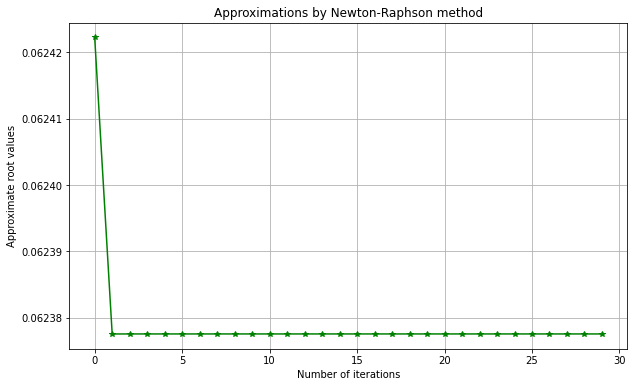

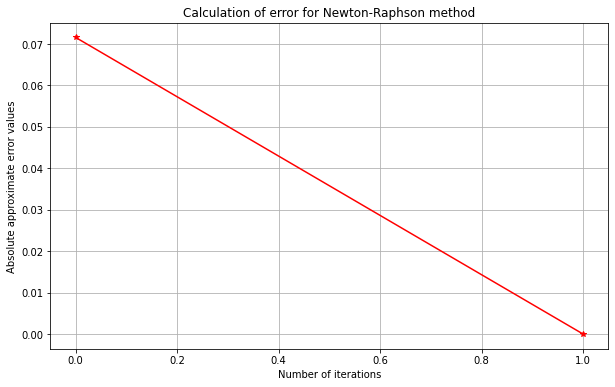

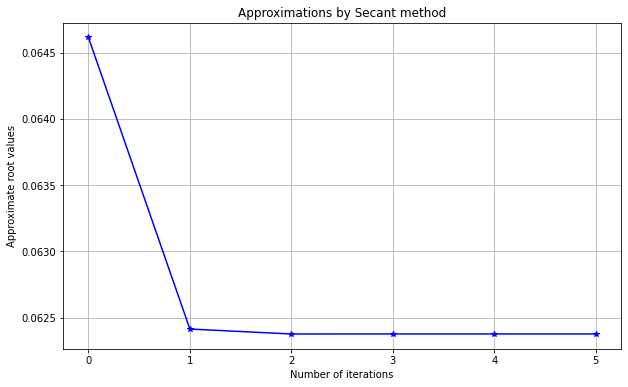

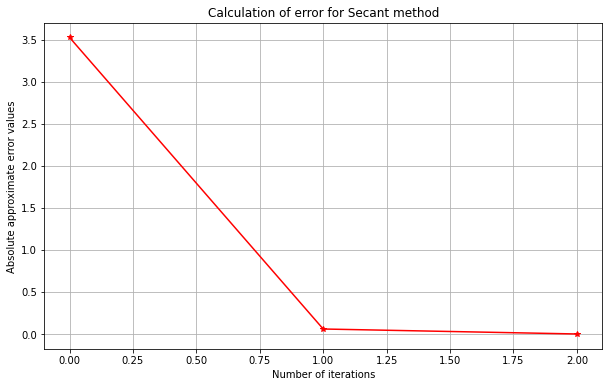

In [ ]:
app_for_newton = []
app_for_secant = []

errors_of_newton = []
errors_of_secant = []

x = Symbol('x')
y = x**3 - 0.165 * (x**2) + 3.993 * (10**(-4))
n = 30
err_lim = 0.00005

app_for_newton = newton__(y, 0.05, n)
app_for_secant = secant__(y, 0.02, 0.05, n)

errors_of_newton = calc_error(app_for_newton, err_lim)
errors_of_secant = calc_error(app_for_secant, err_lim)

plt.figure(figsize=(10,6))
plt.plot(app_for_newton[:], 'g*-')
plt.title('Approximations by Newton-Raphson method')
plt.xlabel('Number of iterations')
plt.ylabel('Approximate root values')
plt.grid('both')

plt.figure(figsize=(10,6))
plt.plot(errors_of_newton[:], 'r*-')
plt.title('Calculation of error for Newton-Raphson method')
plt.xlabel('Number of iterations')
plt.ylabel('Absolute approximate error values')
plt.grid('both')

plt.figure(figsize=(10,6))
plt.plot(app_for_secant[:], 'b*-')
plt.title('Approximations by Secant method')
plt.xlabel('Number of iterations')
plt.ylabel('Approximate root values')
plt.grid('both')

plt.figure(figsize=(10,6))
plt.plot(errors_of_secant[:], 'r*-')
plt.title('Calculation of error for Secant method')
plt.xlabel('Number of iterations')
plt.ylabel('Absolute approximate error values')
plt.grid('both')
plt.show()

###Observation###

=> In Newton-Raphson method we can see that the desired error limit is reached within the first iteration.

=> In case of Secant method it took 2 iterations.

=> In both the cases, after reaching the desired error limit, the roots in between the iterations are getting closer and closer.